# SLU Opportunity Wise Data Cleaning Project

## Importing Libraries

In [1]:
import pandas as pd
import re
import seaborn as sns
from datetime import datetime

## Data Loading

In [2]:
df = pd.read_csv('data/SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv')
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,06/14/2023 12:36:09,11/03/2022 18:30:39
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,05/01/2023 06:08:21,11/03/2022 18:30:39
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,05/11/2023 1085640:21:29,11/03/2022 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,10/09/2023 22:02:42,11/03/2022 18:30:39
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,01/06/2023 15:40:10,11/03/2022 18:30:39


## Data exploration

### 1. Examining the Shape

In [3]:
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (8558, 16)


### 2. Inspecting Data Types

In [4]:
print("\nData Types of Columns:")
print(df.info())


Data Types of Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8558 non-null   object
 1   Opportunity Id           8558 non-null   object
 2   Opportunity Name         8558 non-null   object
 3   Opportunity Category     8558 non-null   object
 4   Opportunity End Date     8558 non-null   object
 5   First Name               8558 non-null   object
 6   Date of Birth            8558 non-null   object
 7   Gender                   8558 non-null   object
 8   Country                  8558 non-null   object
 9   Institution Name         8553 non-null   object
 10  Current/Intended Major   8553 non-null   object
 11  Entry created at         8558 non-null   object
 12  Status Description       8558 non-null   object
 13  Status Code              8558 non-null   int64 
 14  Apply Date      

### 3. Identifying Missing Values

In [5]:
def calculate_missing_values(df):
    """
    Calculate the missing values and their percentage for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the missing values and their percentage for each column.
    """
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print(f"Total rows in the DataFrame: {len(df)}")
    missing_info = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
    return missing_info

missing_info = calculate_missing_values(df)
print("\nMissing Values Information:")
print(missing_info)

Total rows in the DataFrame: 8558

Missing Values Information:
                         Missing Values  Percentage
Learner SignUp DateTime               0    0.000000
Opportunity Id                        0    0.000000
Opportunity Name                      0    0.000000
Opportunity Category                  0    0.000000
Opportunity End Date                  0    0.000000
First Name                            0    0.000000
Date of Birth                         0    0.000000
Gender                                0    0.000000
Country                               0    0.000000
Institution Name                      5    0.058425
Current/Intended Major                5    0.058425
Entry created at                      0    0.000000
Status Description                    0    0.000000
Status Code                           0    0.000000
Apply Date                            0    0.000000
Opportunity Start Date             3794   44.332788


### 4. Identifying Incosistencies

In [6]:
def non_date_rows(column_data):
  """
  Identifies rows where the column data cannot be converted to a valid datetime.

  Parameters:
  column_data (pd.Series): The column data to check.

  Returns:
  pd.DataFrame: A DataFrame containing rows with invalid datetime values.
  """
  invalid_date_rows = df[pd.to_datetime(column_data, errors='coerce').isna()]
  return invalid_date_rows

# Displaying a sample of 10 rows with invalid datetime values in the 'Opportunity End Date' column
invalid_rows_sample = non_date_rows(df["Opportunity End Date"]).sample(10, random_state=42)
invalid_rows_sample

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
7224,01/05/2024 05:06:47,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,04/11/2024 1094400:00:00,Vishwanth,11/24/1999,Male,United States,Saint louis universy,Computer Information Systems,03/11/2024 12:03:00,Team Allocated,1070,01/05/2024 05:24:01,01/22/2024 24:00:00
6886,01/12/2024 05:44:55,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,04/11/2024 1094400:00:00,Sheharyar,08/08/1994,Male,United States,CUNY Graduate Center,Psychology,03/11/2024 12:02:57,Team Allocated,1070,01/12/2024 06:00:49,01/22/2024 24:00:00
2518,07/09/2023 06:56:27,00000000-0GRA-BD28-CXVV-EYEX21,Health Care Management,Internship,04/12/2024 1095120:00:00,Sumeeth,08/11/2000,Male,India,Saint Louis University,Information Systems,03/11/2024 12:02:08,Team Allocated,1070,09/25/2023 15:33:34,01/08/2024 03:30:46
2330,09/15/2023 19:12:56,00000000-0GRA-BD28-CXVV-EYEX21,Health Care Management,Internship,04/12/2024 1095120:00:00,Kavuri,10/15/2000,Female,United States,Saint Louis university,Computer Science,03/11/2024 12:02:06,Rejected,1030,02/07/2024 05:33:35,NaN
2391,12/30/2023 17:44:43,00000000-0GRA-BD28-CXVV-EYEX21,Health Care Management,Internship,04/12/2024 1095120:00:00,David,04/10/1980,Male,Nigeria,NIIT,Human Resources,03/11/2024 12:02:06,Team Allocated,1070,12/30/2023 18:08:01,01/08/2024 03:30:46
6869,06/16/2023 04:31:25,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,04/11/2024 1094400:00:00,Nkundimana,01/01/1999,Male,Rwanda,University of Rwanda,Student,03/11/2024 12:02:57,Rejected,1030,12/28/2023 03:01:46,NaN
2009,11/09/2023 18:24:55,00000000-0GRA-BD28-CXVV-EYEX21,Health Care Management,Internship,04/12/2024 1095120:00:00,Olivia,12/12/2003,Female,United States,Illinois Institute of Technology,Biomedical Engineering,03/11/2024 12:02:03,Team Allocated,1070,11/09/2023 18:30:35,01/08/2024 03:30:46
6885,01/30/2024 05:48:24,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,04/11/2024 1094400:00:00,Preethi,08/03/1999,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:02:57,Rejected,1030,02/01/2024 05:05:04,NaN
2029,02/10/2024 04:27:23,00000000-0GRA-BD28-CXVV-EYEX21,Health Care Management,Internship,04/12/2024 1095120:00:00,Shreeja Yadav,10/09/2000,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:02:03,Rejected,1030,02/13/2024 04:34:05,NaN
6865,08/10/2023 16:04:17,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,04/11/2024 1094400:00:00,Vinay Kumar,06/09/1996,Male,India,Saint Louis University,Information Systems,03/11/2024 12:02:57,Rejected,1030,01/03/2024 22:54:27,NaN


In [7]:
# Identifying outliers using the IQR method
def identify_outliers(df):
    """
    Identify outliers in numerical columns of the DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary with column names as keys and indices of outliers as values.
    """
    outliers = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = outlier_indices.tolist()
    return outliers

# Identifying outliers in the raw dataset
outliers = identify_outliers(df)
print("\nOutliers identified in numerical columns:")
for column, indices in outliers.items():
    print(f"{column}: {len(indices)} outliers")


Outliers identified in numerical columns:
Status Code: 0 outliers


## Data Cleaninng

### 1. Dropping duplicate rows

In [8]:
df.drop_duplicates(inplace=True)
print(f"\nShape of the DataFrame after removing duplicates: {df.shape}")


Shape of the DataFrame after removing duplicates: (8558, 16)


### 2. Converting Date/Time Columns into datetime datatype

In [9]:
# Cleaning malformed datetime strings like '04/12/2024 1095120:00:00'
def clean_datetime(date_string):
    """Cleans malformed datetime strings like 'MM/DD/YYYY "extra numbers":HH:MM:SS'."""
    if isinstance(date_string, str):  # Check if it is a string.
        # Use regular expression to match the date part and extract it.
        match = re.match(r'(\d{2}/\d{2}/\d{4})\s+\d+:\d{2}:\d{2}', date_string)
        if match:
            # Extract the date part and replace the time with '00:00:00'
            return match.group(1) + " 00:00:00"
        else:
            return date_string  # If there is no match, return the original string.
    else:
        return date_string  # If it is not a string, return the original value.

# Assuming df is your original DataFrame
df_cleaned = df.copy()
date_time_columns = ['Learner SignUp DateTime', 'Opportunity End Date', 'Date of Birth', 'Entry created at', 'Apply Date', 'Opportunity Start Date']

for column in date_time_columns:
    df_cleaned[column] = df_cleaned[column].apply(clean_datetime)

In [10]:
# Converting date/time columns to datetime objects
for column in date_time_columns:
    df_cleaned[column] = pd.to_datetime(df_cleaned[column], errors='coerce')

print("\nData Types of Columns after converting date/time columns to datetime objects:")
print(df_cleaned.info())


Data Types of Columns after converting date/time columns to datetime objects:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8558 non-null   datetime64[ns]
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     8558 non-null   datetime64[ns]
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   datetime64[ns]
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8553 non-null   object        
 10  Current/Intended Major   8553 non-null   object        
 11  Entry created at

### 3. Handling inconsistent formatting in categorical columns

In [11]:
categorical_columns = ['Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Status Description']
for column in categorical_columns:
    df_cleaned[column] = df_cleaned[column].str.strip().str.lower()

### 4. Handling Missing Values

In [12]:
# Dropping rows with missing values in 'Institution Name' and 'Current/Intended Major'
df_cleaned = df_cleaned.dropna(subset=['Institution Name', 'Current/Intended Major'])

Reasoning: `Institution Name` and `Current/Intended Major` have a small percentage missing so they are dropped.

In [13]:
# Checking for missing values
missing_info = calculate_missing_values(df_cleaned)
print("\nMissing Values Information:")
print(missing_info)

Total rows in the DataFrame: 8548

Missing Values Information:
                         Missing Values  Percentage
Learner SignUp DateTime               0    0.000000
Opportunity Id                        0    0.000000
Opportunity Name                      0    0.000000
Opportunity Category                  0    0.000000
Opportunity End Date                  0    0.000000
First Name                            0    0.000000
Date of Birth                         0    0.000000
Gender                                0    0.000000
Country                               0    0.000000
Institution Name                      0    0.000000
Current/Intended Major                0    0.000000
Entry created at                      0    0.000000
Status Description                    0    0.000000
Status Code                           0    0.000000
Apply Date                            4    0.046795
Opportunity Start Date             3790   44.337857


In [14]:
# Dropping rows with missing values in 'Institution Name' and 'Current/Intended Major'
df_cleaned = df_cleaned.dropna(subset=['Apply Date'])

# Calculating Opportunity Duration
df_cleaned['Opportunity_Duration'] = (pd.to_datetime(df_cleaned['Opportunity End Date']) - pd.to_datetime(df_cleaned['Opportunity Start Date'])).dt.days

# Imputing missing values in 'Opportunity Start Date' using the average duration
average_duration = df_cleaned['Opportunity_Duration'].mean()
df_cleaned['Opportunity Start Date'] = df_cleaned['Opportunity Start Date'].fillna(
    pd.to_datetime(df_cleaned['Opportunity End Date']) - pd.to_timedelta(average_duration, unit='d')
)


Reasoning: `Opportunity Start Date` has a large percentage missing so it has to be imputed

## Feature Engineering

In [15]:
# Calculating Age
current_datetime = datetime.now()
df_cleaned['Age'] = (current_datetime - pd.to_datetime(df_cleaned['Date of Birth'])).dt.days // 365

# Calculating Opportunity Duration
df_cleaned['Opportunity_Duration'] = (pd.to_datetime(df_cleaned['Opportunity End Date']) - pd.to_datetime(df_cleaned['Opportunity Start Date'])).dt.days

display(df_cleaned.head())

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Opportunity_Duration,Age
0,2023-06-14,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Faria,2001-01-12,female,pakistan,nwihs,radiology,2024-03-11,started,1080,2023-06-14,2022-11-03,604,24
1,2023-05-01,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Poojitha,2000-08-16,female,india,saint louis,information systems,2024-03-11,started,1080,2023-05-01,2022-11-03,604,24
2,2023-04-09,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Emmanuel,2002-01-27,male,united states,illinois institute of technology,computer science,2024-03-11,started,1080,2023-05-11,2022-11-03,604,23
3,2023-08-29,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Amrutha Varshini,1999-11-01,female,united states,saint louis university,information systems,2024-03-11,team allocated,1070,2023-10-09,2022-11-03,604,25
4,2023-01-06,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Vinay Varshith,2000-04-19,male,united states,saint louis university,computer science,2024-03-11,started,1080,2023-01-06,2022-11-03,604,24


In [16]:
# Calculate the average opportunity duration
average_opportunity_duration = df_cleaned['Opportunity_Duration'].mean()
print(f"\nAverage Opportunity Duration: {average_opportunity_duration:.2f} days")


Average Opportunity Duration: 287.12 days


<Axes: xlabel='Opportunity_Duration', ylabel='Count'>

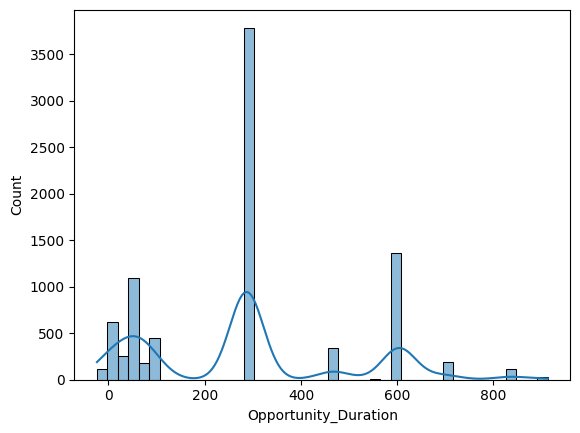

In [17]:
# Displaying the distribution of the 'Opportunity Duration' column
sns.histplot(df_cleaned['Opportunity_Duration'], kde=True)

## Exporting the Data

In [18]:
# Renaming columns to lowercase and replacing spaces with underscores
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

# Displaying the updated column names
print("\nUpdated Column Names:")
print(df_cleaned.columns)



Updated Column Names:
Index(['learner_signup_datetime', 'opportunity_id', 'opportunity_name',
       'opportunity_category', 'opportunity_end_date', 'first_name',
       'date_of_birth', 'gender', 'country', 'institution_name',
       'current/intended_major', 'entry_created_at', 'status_description',
       'status_code', 'apply_date', 'opportunity_start_date',
       'opportunity_duration', 'age'],
      dtype='object')


In [19]:
# Checking data types of columns
print("\nData Types of Columns:")
print(df_cleaned.info())


Data Types of Columns:
<class 'pandas.core.frame.DataFrame'>
Index: 8544 entries, 0 to 8557
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   learner_signup_datetime  8544 non-null   datetime64[ns]
 1   opportunity_id           8544 non-null   object        
 2   opportunity_name         8544 non-null   object        
 3   opportunity_category     8544 non-null   object        
 4   opportunity_end_date     8544 non-null   datetime64[ns]
 5   first_name               8544 non-null   object        
 6   date_of_birth            8544 non-null   datetime64[ns]
 7   gender                   8544 non-null   object        
 8   country                  8544 non-null   object        
 9   institution_name         8544 non-null   object        
 10  current/intended_major   8544 non-null   object        
 11  entry_created_at         8544 non-null   datetime64[ns]
 12  status_descript

In [20]:
# Checking for missing values
missing_info = calculate_missing_values(df_cleaned)
print("\nMissing Values Information:")
print(missing_info)

Total rows in the DataFrame: 8544

Missing Values Information:
                         Missing Values  Percentage
learner_signup_datetime               0         0.0
opportunity_id                        0         0.0
opportunity_name                      0         0.0
opportunity_category                  0         0.0
opportunity_end_date                  0         0.0
first_name                            0         0.0
date_of_birth                         0         0.0
gender                                0         0.0
country                               0         0.0
institution_name                      0         0.0
current/intended_major                0         0.0
entry_created_at                      0         0.0
status_description                    0         0.0
status_code                           0         0.0
apply_date                            0         0.0
opportunity_start_date                0         0.0
opportunity_duration                  0         0.0
a

In [21]:
# Identifying outliers
outliers = identify_outliers(df_cleaned)
print("\nOutliers identified in numerical columns:")
for column, indices in outliers.items():
    print(f"{column}: {len(indices)} outliers")


Outliers identified in numerical columns:
status_code: 0 outliers
opportunity_duration: 337 outliers
age: 975 outliers


In [22]:
# Saving the cleaned data to a new CSV file
df_cleaned.to_csv('output/cleaned_data.csv', index=False)